# **Exercicio de Modelagem e Analise de Dados**


**Objetivos**

*   Apresentar e utilizar o pacote pandas
*   Como carregar uma base dados
*   Como visualizar os dados
*   Intuição de análise exploratória de dados

1. Utilizando o pacote Pandas, crie um dataframe com o nome de 4 pokémons originais, contendo seu nome, tipo e principal ataque.

Veja mais em: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [ ]:
import pandas as pd

# Cria uma dataframe
data = {
  "Nome": ["Pikachu", "Bulbassauro", "Squirtle","Charmander"],
  "tipo": ["Elétrico", "Planta", "Água", "Fogo"],
  "Ataque": ["Choque do Trovão", "Chicote de Vinha", "Jato d'agua", "Lança Chamas"]
}

# Carrega o dataframe
df = pd.DataFrame(data)
df

,Nome,tipo,Ataque
0,Pikachu,Elétrico,Choque do Trovão
1,Bulbassauro,Planta,Chicote de Vinha
2,Squirtle,Água,Jato d'agua
3,Charmander,Fogo,Lança Chamas


2. Agora, usando as técnicas de One Hot Encoder e Label Enconder, converta a coluna Tipo em dados numéricos.

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Copia o df para nao perder o original
dfLabel = df.copy()

#Cria o objeto labelEncoder
labelencoder = LabelEncoder()

# treina
labelencoder.fit(dfLabel['tipo'])

# aplica transformação
dfLabel['tipo'] = labelencoder.transform(dfLabel['tipo'])

dfLabel.head()

,Nome,tipo,Ataque
0,Pikachu,0,Choque do Trovão
1,Bulbassauro,2,Chicote de Vinha
2,Squirtle,3,Jato d'agua
3,Charmander,1,Lança Chamas


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

#Copia o df para nao perder o original
dfHotOne = df.copy()

#Cria o objeto OneHotEncoder
ohe = OneHotEncoder()

# aplica transformação
ponte_ohe = ohe.fit_transform(dfHotOne[['tipo']]).toarray()

ponte_ohe

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
#transforma o o np.arry em um dataframe
ponte_ohe = pd.DataFrame(ponte_ohe,columns=["tipo"+str(int(i)) for i in range(dfHotOne.shape[0])])

#adiciona as novas colunas ao dataframe original
dfHotOne = pd.concat([dfHotOne,ponte_ohe], axis=1)

dfHotOne.head()

,Nome,tipo,Ataque,tipo0,tipo1,tipo2,tipo3
0,Pikachu,Elétrico,Choque do Trovão,1.0,0.0,0.0,0.0
1,Bulbassauro,Planta,Chicote de Vinha,0.0,0.0,1.0,0.0
2,Squirtle,Água,Jato d'agua,0.0,0.0,0.0,1.0
3,Charmander,Fogo,Lança Chamas,0.0,1.0,0.0,0.0


3. Trabalhando com Datasets

a. Carregue o dataset Iris, do endereço https://archive.ics.uci.edu/ml/datasets/Iris

In [ ]:
# Caminho do arquivo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Lê e carrega o arquivo para a memória
df = pd.read_csv(url)

# Vamos mostrar as primeiras 10 linhas do dataset
df.head(10)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


Note que a primeira linha não é com os nomes das colunas ou atributos(variaveis) e sim de dados (valores). Por padrão os dados da primeira linha são importados como atributos.

Vamos adicionar um cabeçario ao nosso dataframe. No repositório oficial é dito que as variaveis são:

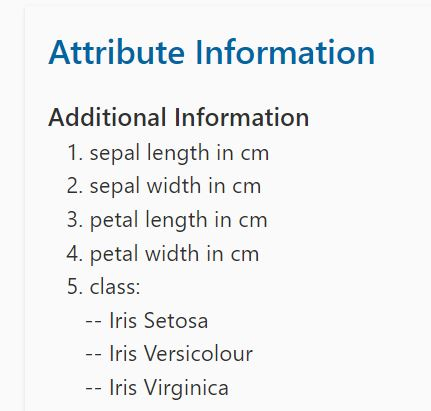

In [ ]:
# Define o nome das colunas
header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
# Lê e carrega o arquivo para a memória
df = pd.read_csv(url, header=None, names=header)
# Vamos mostrar as primeiras 10 linhas do dataset
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


b. Quantos atributos tem esse dataset?

In [ ]:
# Podemos obter várias informações sobre o dataset no próprio repositório, ou nesse caso
# Podemos usar o método info() para obter mais informaçoes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


O info() nos traz várias informaçoes importantes:

Esse dataset tem 4 atributos, que são os exatamente os nomes das colunas:

* sepal_lenght
* sepal_ width
* petal_length
* petal_width



c. Quantos dados tem esse dataset?

In [ ]:
# Analisando o resultado do info(), podemos concluir que esse dataset tem 150 dados:
# RangeIndex: 150 entries, 0 to 149

# Também podemos usar outro método para ter essa informação de forma mais rapida:
df.shape

# shape exibe as dimensões do dataframe. Nesse caso, temos 150 dados, em 5 colunas

(150, 5)

d. Existem dados faltantes?

In [ ]:
# Novamente, podemos analisar o resultado do info():
# Data columns (total 5 columns):
#  #   Column        Non-Null Count  Dtype
# ---  ------        --------------  -----
# 0   sepal_length  150 non-null    float64
# 1   sepal_width   150 non-null    float64
# 2   petal_length  150 non-null    float64
# 3   petal_width   150 non-null    float64
# 4   class         150 non-null    object

# A tabela nos mostra que dos 150 valores em cada coluna, nenhum é nulo (non-null)

# Outra forma é questionando o Dataframe:
tem_nulos = df.isnull().any().any()

print(tem_nulos)

False


In [ ]:
# se printarmos o metodo isnull() diretamente do dataframe, ele vai mostrar com mais detalhes

df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


e. De que tipo são os dados?

In [ ]:
# Essa informação é facilmente obtida do .info():
# dtypes: float64(4), object(1) -> Neste caso, temos 4 atributos do tipo float64 e 1 atributo do tipo object

# A representação das colunas nos dá os detalhes:

# Data columns (total 5 columns):
#  #   Column        Non-Null Count  Dtype
# ---  ------        --------------  -----
# 0   sepal_length  150 non-null    float64
# 1   sepal_width   150 non-null    float64
# 2   petal_length  150 non-null    float64
# 3   petal_width   150 non-null    float64
# 4   class         150 non-null    object

f. Quais são os labels desse dataset?

In [ ]:
# Os labels, ou classes são geralmente a ultima coluna, contendo algum tipo de object.
# No nosso caso, os labels são os nomes das espécies de Flor Iris.
# Podemos obter essa informação no site do repositório ou atravér do método groupby:

print(df.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


g. Usando uma biblitéca gráfica, tente chegar a alguma conclusão sobre como os dados se relacionam.

São 150 exemplares de flor de íris, pertencentes a três espécies diferentes: setosa, versicolor e virginica, sendo 50 amostras de cada espécie. Os atributos de largura e comprimento de sépala e largura e comprimento de pétala de cada flor fooram medidos manualmente.

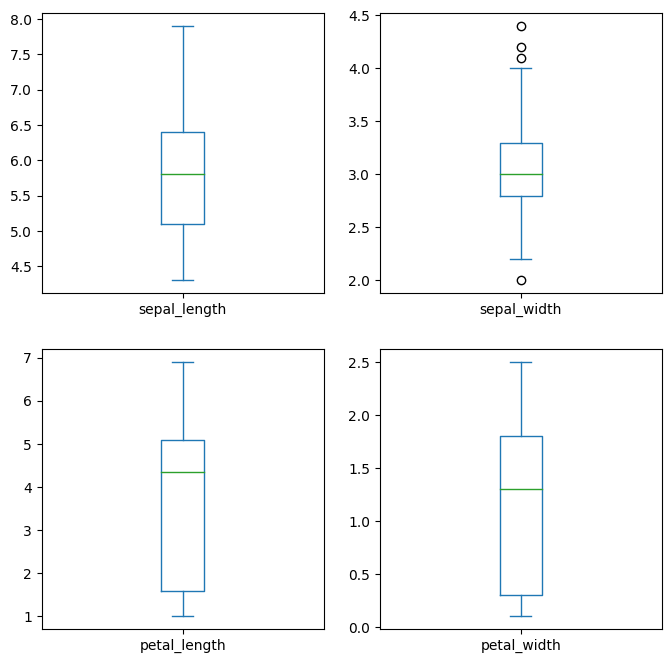

In [ ]:
# Inicializção das bibliotecas
%matplotlib inline
import matplotlib.pyplot as plt

# box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(8, 8))
plt.show()

Os gráficos de boxplot (box and whisker plots) são uma forma visual de representar a distribuição de um conjunto de dados. Eles fornecem informações sobre a mediana, quartis, valores mínimo e máximo, além de identificar possíveis valores atípicos (outliers). Aqui está uma interpretação geral dos elementos de um boxplot:

Caixa (box):

* A linha vertical dentro da caixa representa a mediana (segundo quartil ou valor central).

* A parte inferior da caixa é o primeiro quartil (25º percentil), ou seja, 25% dos dados estão abaixo desse valor.

* A parte superior da caixa é o terceiro quartil (75º percentil), ou seja, 75% dos dados estão abaixo desse valor.

* A altura da caixa é chamada de amplitude interquartil (IQR) e é a diferença entre o terceiro quartil e o primeiro quartil.

Bigodes (whiskers):

* Os bigodes verticalmente estendidos representam a variação dos dados além do primeiro e terceiro quartis.

* Geralmente, os bigodes se estendem até 1,5 vezes o IQR a partir dos quartis. Valores fora dessa faixa são considerados outliers.

* Os bigodes podem ser exibidos como linhas ou pontos, dependendo da implementação ou configuração específica do gráfico.

Outliers:

* Pontos individuais ou marcadores que estão fora dos bigodes são considerados outliers.
* Outliers podem indicar valores incomuns ou extremos no conjunto de dados.

Esses elementos fornecem uma visão geral da distribuição e variação dos dados. Eles ajudam a identificar tendências centrais, dispersão, assimetria e presença de valores discrepantes. A interpretação dos gráficos de boxplot depende do contexto específico do conjunto de dados e do objetivo da análise.

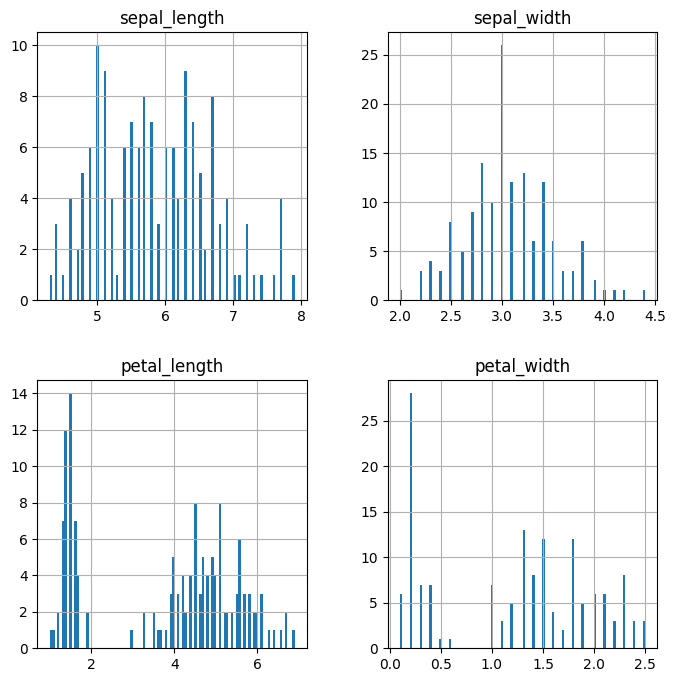

In [ ]:
#  Histograma, que exibe uma gráfico de frequência.
df.hist(bins=100, figsize=(8, 8))
plt.show()

Um histograma ou gráfico de frequências é uma representação visual da distribuição dos valores de um conjunto de dados. Ele mostra a frequência ou contagem de ocorrências de diferentes intervalos (bins) de valores.

A interpretação de um histograma envolve várias informações-chave:

1. Eixo x (horizontal): Representa os valores do conjunto de dados em intervalos ou categorias.

2. Eixo y (vertical): Representa a contagem de ocorrências ou frequência dos valores em cada intervalo.

3. Forma da distribuição: A forma geral do histograma pode indicar o tipo de distribuição dos dados. Por exemplo:

* Distribuição simétrica: Os valores são equilibrados em torno de um ponto central, como uma forma de sino (distribuição normal).
* Distribuição assimétrica: Os valores são deslocados para um dos lados, indicando uma assimetria positiva (à direita) ou negativa (à esquerda).
* Distribuição bimodal: Existem dois picos ou modos distintos, sugerindo duas populações ou grupos diferentes de valores.

4. Altura das barras: A altura das barras do histograma representa a frequência ou contagem de valores em cada intervalo. Quanto mais alta a barra, maior a frequência.

5. Largura dos intervalos (bins): A largura dos intervalos no eixo x é determinada pelo intervalo de valores e pela escolha dos bins. Intervalos menores podem revelar mais detalhes sobre a distribuição, enquanto intervalos maiores podem suavizar a visualização.

6. Valores atípicos (outliers): Valores atípicos ou discrepantes podem ser identificados no histograma como barras isoladas ou separadas do restante da distribuição.

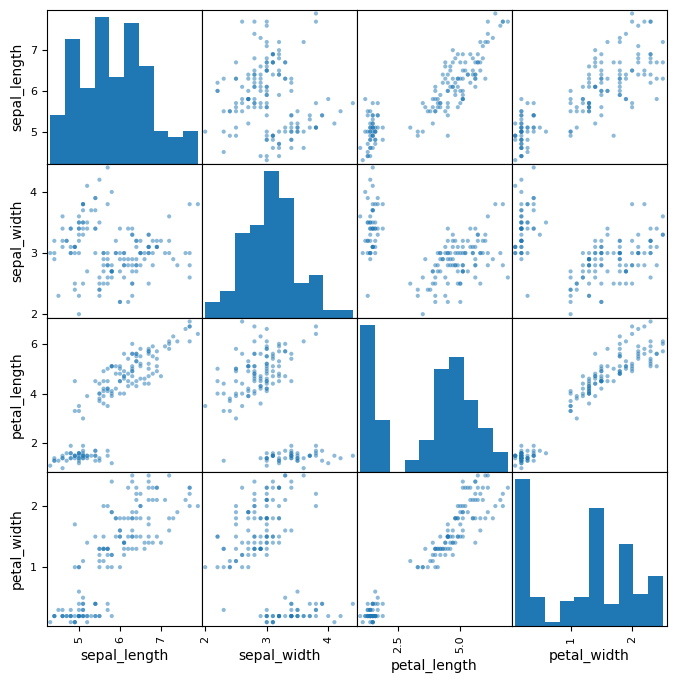

In [ ]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(8, 8))
plt.show()

Um scatter plot matrix, também conhecido como matriz de dispersão, é uma visualização que mostra múltiplos gráficos de dispersão em uma grade, onde cada gráfico representa a relação entre dois atributos (variáveis) diferentes de um conjunto de dados. A interpretação de um scatter plot matrix envolve as seguintes informações:

1. Gráficos de dispersão individuais: Cada gráfico de dispersão na matriz representa a relação entre dois atributos específicos. O eixo x e o eixo y de cada gráfico correspondem aos valores desses dois atributos. A dispersão dos pontos no gráfico indica a relação entre os atributos.

2. Padrões de dispersão: A forma geral dos pontos no gráfico de dispersão pode indicar a presença de padrões ou tendências na relação entre os atributos. Isso pode incluir:

* Relação linear positiva: Os pontos tendem a seguir uma tendência ascendente.
* Relação linear negativa: Os pontos tendem a seguir uma tendência descendente.
* Ausência de relação linear: Os pontos não mostram uma tendência clara.

3. Correlação: A dispersão dos pontos nos gráficos de dispersão pode fornecer uma indicação visual da correlação entre os atributos. A correlação é uma medida estatística da relação entre os atributos, indicando se eles se movem em conjunto (correlação positiva) ou de forma oposta (correlação negativa). Nos gráficos de dispersão, quando os pontos estão mais próximos de uma linha reta (ou curva), indica uma correlação mais forte entre os atributos.

4. Outliers: Os outliers são pontos que se destacam significativamente dos demais pontos no gráfico de dispersão. Eles podem indicar valores extremos ou anomalias nos atributos.

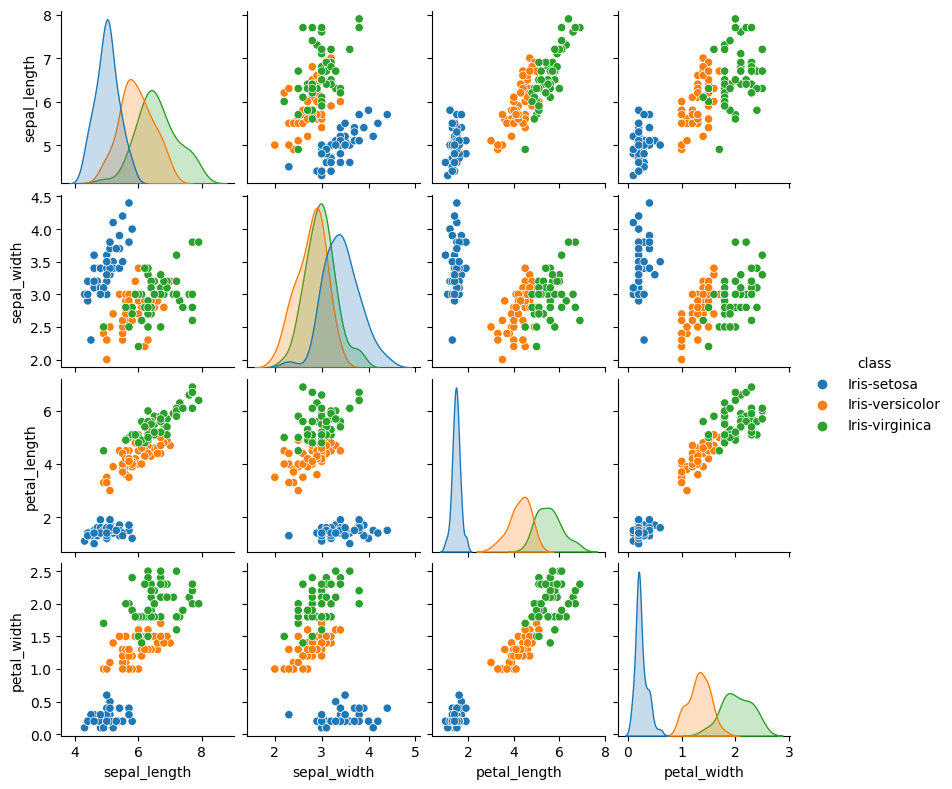

In [ ]:
# Vamos usar o Seaborn para melhorar a visualização do Scatter plot

import seaborn as sns

# A cor vem do campo `species` do dataframe
sns.pairplot(df, hue='class', height=2)
plt.show()

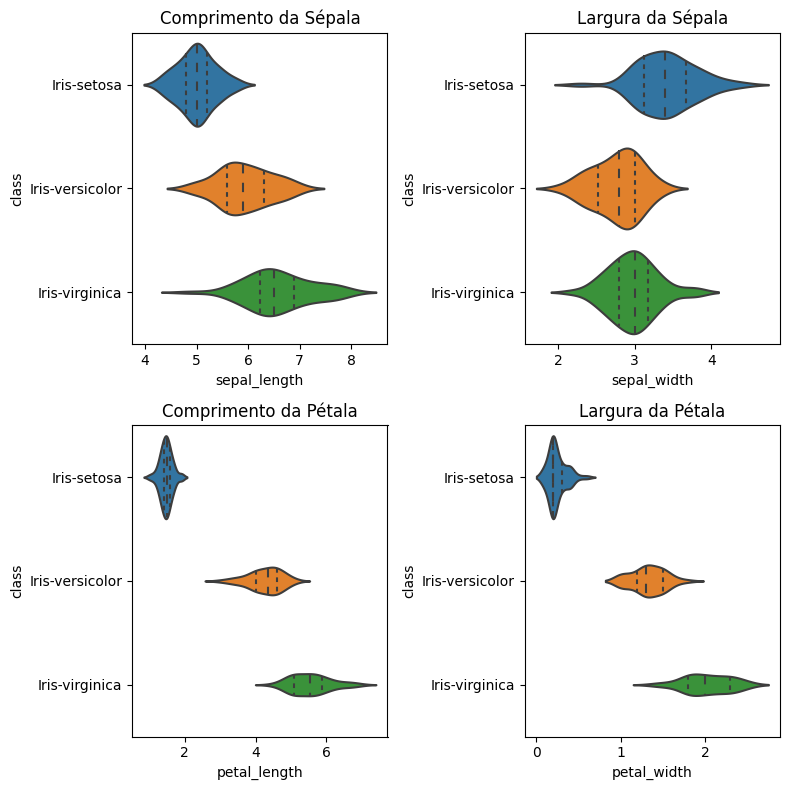

In [ ]:
# Vamos fazer agora uma comparação com Gráficos Violin

# Criando uma figura com 2 linhas e 2 colunas para os subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Gráfico de violino 1
sns.violinplot(y="class", x="sepal_length", data=df, ax=axs[0, 0], inner='quartile')
axs[0, 0].set_title('Comprimento da Sépala')

# Gráfico de violino 2
sns.violinplot(y="class", x="sepal_width", data=df, ax=axs[0, 1], inner='quartile')
axs[0, 1].set_title('Largura da Sépala')

# Gráfico de violino 3
sns.violinplot(y="class", x="petal_length", data=df, ax=axs[1, 0], inner='quartile')
axs[1, 0].set_title('Comprimento da Pétala')

# Gráfico de violino 4
sns.violinplot(y="class", x="petal_width", data=df, ax=axs[1, 1], inner='quartile')
axs[1, 1].set_title('Largura da Pétala')

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo a figura com os subplots
plt.show()

O violin plot, também conhecido como gráfico de violino, é uma representação visual que combina os elementos de um box plot com uma estimativa da densidade de probabilidade dos dados. A interpretação de um violin plot envolve as seguintes informações:

1. Caixas (box):

* Assim como em um box plot, a caixa central representa a mediana dos dados.
* A parte inferior da caixa é o primeiro quartil (25º percentil) e a parte superior é o terceiro quartil (75º percentil).
* A altura da caixa indica a amplitude interquartil (IQR), que representa a variação dos dados em torno da mediana.

2. Estimativa de densidade de probabilidade:

* A forma do "violino" representa a estimativa da densidade de probabilidade dos dados.
* A espessura do "violino" em diferentes partes indica a frequência ou a densidade de valores naquela região. Áreas mais espessas representam maior frequência de valores.
* A largura do "violino" não tem um significado específico e é apenas uma representação visual da distribuição.

3. Pontos ou marcadores:

* Os pontos individuais ou marcadores que aparecem fora dos "violinos" representam valores atípicos ou discrepantes.

4. Comparação entre grupos:

* Quando múltiplos "violinos" são apresentados em um único gráfico, é possível comparar a distribuição dos dados entre diferentes grupos ou categorias.
* A sobreposição de "violinos" indica uma sobreposição nas distribuições, enquanto a separação indica diferenças nas distribuições entre os grupos.

Ao interpretar um violin plot, você pode analisar a distribuição dos dados, identificar tendências centrais, comparar a variação entre grupos e detectar valores atípicos. Além disso, o formato do "violino" pode fornecer informações sobre a assimetria da distribuição e a presença de múltiplos modos ou picos.

h. Use uma matriz de correlação para identificar a relação entre os atributos

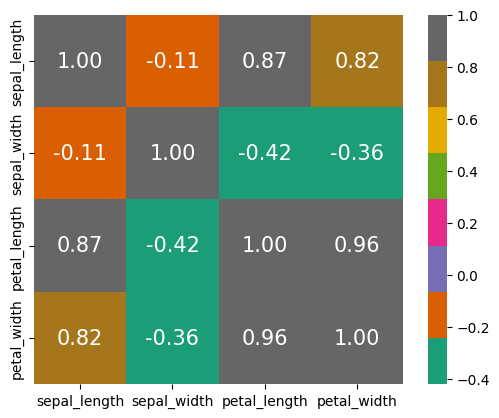

In [ ]:
# A matriz de correlação avalia a relação entre duas ou mais variaveis (correlação).

# valores:

# 0.9 a 1 positivo ou negativo indica uma correlação muito forte.
# 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
# 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
# 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
# 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

# Lembre-se que: alta correlação não implica em causa. (causa e consequência).

# Para entender melhor vale a pena dar uma olhada nesse site
# que mostra correlações absurdas: https://www.tylervigen.com/spurious-correlations

cols = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
corr_matx = df[cols].corr()
heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

**DESAFIO**

Analise os gráficos gerados até o momento para responder as questões abaixo:

1. A especie que possui na média a menor sepala é a mesma que possui a menor petala?

2. Existe sobreposição entre as medições, ou seja, uma petala de tamanho x pode ser tanto da especie versicolor ou da virginica?

3. É possivel classificar as especies de iris com base apenas em suas dimensões?

In [ ]:
### Implemente sua solução e apresente sua análise....

4. Repita o exercício anterior com o dataset Breast Cancer, diponível em https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original